<a href="https://colab.research.google.com/github/CodesTree/ProjectsForFun/blob/main/Sentiment%20Analysis%20for%20IMDB%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test 1 Sentiment Labelled Sentences dataset

Goal: perform word cloud with most common positive and negative words and a logistics regression for sentiment analysis conducted

Insights aim to found out what is being said positively and negatively by reviews in the dataset

Dataset link: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data (from "https://ics.uci.edu/~smyth/courses/cs175/text_data_sets.html" kaggle link)

In [1]:
#Importing libraries and setting up dataset to be loaded as DataFrame
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Upload CSV File into Drive to proceed
df = pd.read_csv('/content/drive/My Drive/SWA/Final Assignment/IMDB Dataset.csv')

In [3]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Understanding more about the data within the dataset

In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Data cleaning

Part 1: removing html tags from review column

Part 2: removing stopwords and contractions from review column

Part 3: stemming review column (to find most commonly used words in the dataset so lemmatization is not used)


In [6]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.7 MB/s eta 0:00:00


In [7]:
#Importing libraries for data cleaning with text data
#To handle text data with replace with regex
import re

#To remove html tags
from bs4 import BeautifulSoup

#To conduct NLP
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import contractions

#To convert review column into numerical data
from sklearn.preprocessing import OneHotEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
#Part 1
df_cleaned = df.copy()

def remove_html_tags(text):
  #This method removes all html tags and returns text values
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()

def remove_special_char(text):
    #Using regex to remove special characters such as digit, whitespace, or apostrophe, and replaces it with an empty string
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Applying remove_html_tags function to remove all html tags from review
df_cleaned['review'] = df['review'].apply(remove_html_tags)

#Applying remove_special_char function to remove all special characters from review
df_cleaned['review'] = df['review'].apply(remove_special_char)

<ipython-input-10-5963bc8c3c95>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [11]:
df_cleaned.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [12]:
#Part 2
#Turning all review text into lowercase in a new column
df_cleaned['review_cleaned'] = df_cleaned['review'].str.lower()

#Converting review into tokens
df_cleaned['review_cleaned'] = df_cleaned['review_cleaned'].apply(word_tokenize)

#Expanding the contractions of the 'descriptions' column to apply contraction.fix() onto each word
df_cleaned['review_cleaned'] = df_cleaned['review_cleaned'].apply(lambda x: [contractions.fix(word) for word in x])

#Removing stopwords
stop_words=set(stopwords.words('english'))
df_cleaned['review_cleaned'] = df_cleaned['review_cleaned'].apply(lambda x: [word for word in x if word not in stop_words])

In [13]:
df_cleaned.head(5)

,review,sentiment,review_cleaned
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production br br The filmin...,positive,"[wonderful, little, production, br, br, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically theres a family where a little boy J...,negative,"[basically, there is, family, little, boy, jak..."
4,Petter Matteis Love in the Time of Money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [14]:
#Part 3
#Initialize PorterStemmer
stemmer = PorterStemmer()

#Stemming the text
df_cleaned['review_cleaned'] = df_cleaned['review_cleaned'].apply(lambda x: [stemmer.stem(word) for word in x])

In [15]:
df_cleaned.head(5)

,review,sentiment,review_cleaned
0,One of the other reviewers has mentioned that ...,positive,"[one, review, mention, watch, 1, oz, episod, y..."
1,A wonderful little production br br The filmin...,positive,"[wonder, littl, product, br, br, film, techniq..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically theres a family where a little boy J...,negative,"[basic, there i, famili, littl, boy, jake, thi..."
4,Petter Matteis Love in the Time of Money is a ...,positive,"[petter, mattei, love, time, money, visual, st..."


Part 2: Visualising the most used words in positive and negative reviews in a word cloud

In [16]:
#Importing wordcloud library
from wordcloud import WordCloud

#Importing visualisation graphs
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

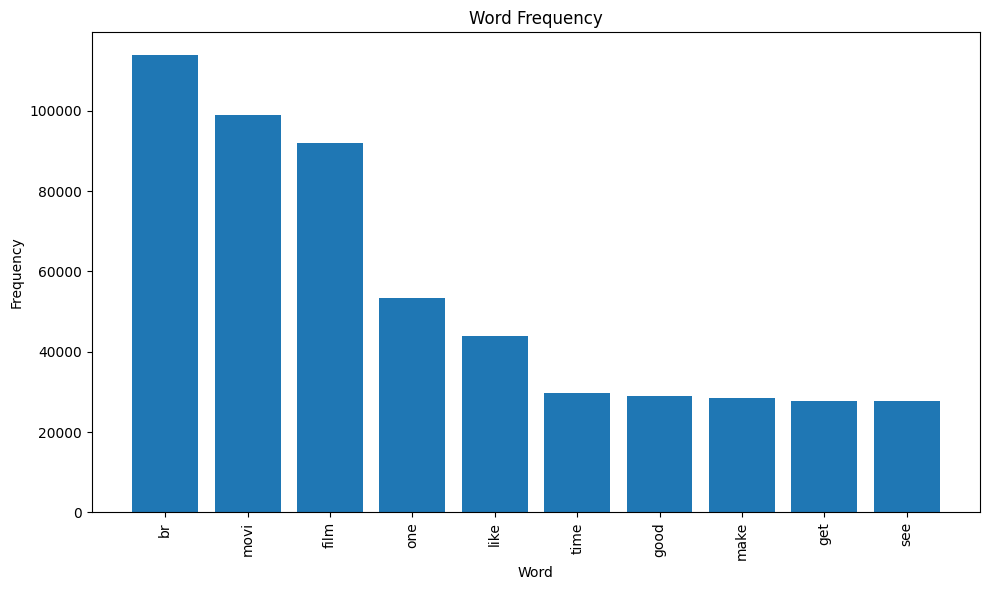

In [17]:
#Flatten the list of all words in the 'review_cleaned' column because FreqDist can only take from one list
all_review_words = [word for review in df_cleaned['review_cleaned'] for word in review]

#Showcase most used words in the reviews
freq_dist = FreqDist(all_review_words)
word_freq = dict(freq_dist.most_common(10))

if len(word_freq)>0:
  #Plotting word frequency
  plt.figure(figsize = (10,6))
  plt.bar(list(word_freq.keys()),word_freq.values())
  plt.xticks(rotation = 90)
  plt.title('Word Frequency')
  plt.xlabel('Word')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

In [18]:
df_positive = df_cleaned[df_cleaned['sentiment'] == 'positive'].copy()
df_negative = df_cleaned[df_cleaned['sentiment'] == 'negative'].copy()

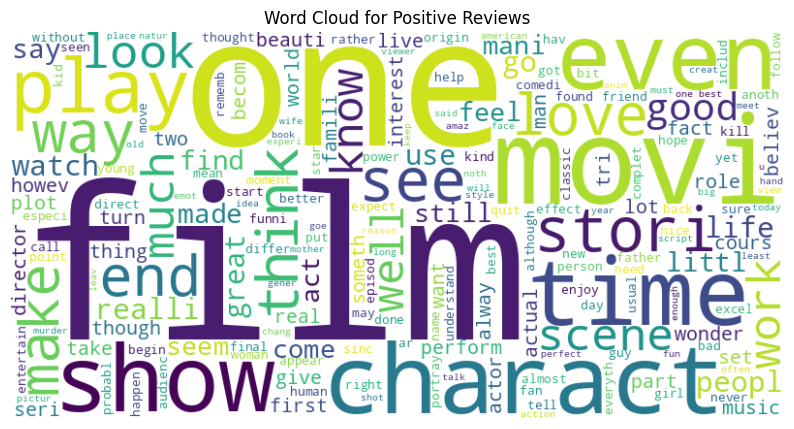

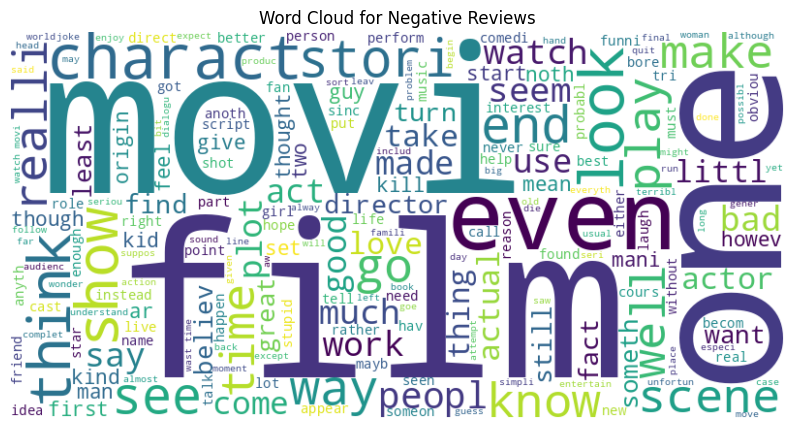

In [35]:
#Function for plotting wordcloud
def plot_wordcloud(df, title):
    all_words = ' '.join([' '.join(review) for review in df['review_cleaned']])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {title}')
    plt.axis("off")
    plt.show()

#Apply function for positive words
plot_wordcloud(df_positive, 'Positive Reviews')

#Apply function for negative words
plot_wordcloud(df_negative, 'Negative Reviews')

Part 3: Using Logistics Regression for a more accurate WordCloud

References:
1. https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews
2. https://makemeanalyst.com/sentiment-analysis-with-logistic-regression/#:~:text=Sentiment%20Analysis%20is%20a%20common,be%20applied%20to%20this%20task.
3. https://www.kdnuggets.com/2022/09/convert-text-documents-tfidf-matrix-tfidfvectorizer.html#:~:text=Term%20frequency%20Inverse%20document%20frequency,relevant%20words%20in%20the%20document.
4. https://www.kaggle.com/code/loryn808/baseline-bag-of-words-linear-regression
5. https://www.sciencedirect.com/topics/engineering/confusion-matrix

In [49]:
#Importing libraries for Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Classification Report for the performance of the model
from sklearn.metrics import classification_report, accuracy_score
#Confusion Matrix to understand performance of a classification algorithm
from sklearn.metrics import confusion_matrix

We are using TFIDF over Bag of Words (BOW) because we want to weigh the terms by their importance to the sentiment

We are using a Logistics Regression to predict how heavy the weightage of a word is towards the sentiment of the review to get a better understanding of what makes a review positive or negative.

In [39]:
#Reorganizing DataFrame and rejoning tokens for training and testing by making a TF-IDF (Term Frequency-Inverse Document Frequency)
df_TFIDF = df_cleaned.copy()
df_TFIDF= df_TFIDF.drop('review', axis=1)
df_TFIDF = df_TFIDF[['review_cleaned','sentiment']]

#Rejoining tokens
df_TFIDF['review_cleaned'] = [' '.join(map(str, l)) for l in df_TFIDF['review_cleaned']]

In [40]:
df_TFIDF.head(5)

,review_cleaned,sentiment
0,one review mention watch 1 oz episod you wil h...,positive
1,wonder littl product br br film techniqu unass...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there i famili littl boy jake think ther...,negative
4,petter mattei love time money visual stun film...,positive


In [41]:
#Splitting testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(df_TFIDF['review_cleaned'], df_TFIDF['sentiment'], test_size=0.2, random_state=42)

In [42]:
#Creating a Bag of Words to obtain a matrix of the most relevant words
#Initialising TfidVectorizer
vectorizer = TfidfVectorizer()

#Transformed train reviews
X_train_vec = vectorizer.fit_transform(X_train)

#Transformed test reviews
X_test_vec = vectorizer.transform(X_test)

In [43]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [44]:
#Initialising Model
model = LogisticRegression(max_iter=1000, solver='lbfgs')
#Training Logistic Regression Model
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [45]:
#Testing regression model output
y_pred = model.predict(X_test_vec)

In [46]:
#Printing a classification report
print(classification_report(y_test, model.predict(X_test_vec),labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.88      0.91      0.89      5039
    negative       0.90      0.87      0.89      4961

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [53]:
#Printing a confusion matrix to find the (TP, FN, FP, TN) performance of the classification algorithm
print(confusion_matrix(y_test, model.predict(X_test_vec),labels = ['positive', 'negative']))

[[4575  464]
 [ 622 4339]]


True Positive = 4576

False Negative = 464

False Positive = 622

True Negative = 4339

In [52]:
#Printing accuracy report
model_accuracy_score=accuracy_score(y_test,y_pred)
print("log_reg_tfidf_accuracy_score :", model_accuracy_score)

log_reg_tfidf_accuracy_score : 0.8914


Accuracy Score of the Logistic Regression Model is 89.14%

Identified how to separate and identify the words (features) that weigh heavily into the sentiment of the review

Reference:
1. https://christophm.github.io/interpretable-ml-book/logistic.html
2. Statistics for Data Analytics (STAT2044)(Sunway Bachelor Degree Subject)
3. https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features

In [58]:
#Making a more accurate WordCloud with the predictions made with the logistic regression model
#Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

#Get coefficients for each class (positive and negative) to udnerstand their weightage towards sentiment
coefficients = model.coef_[0]

#Create a DataFrame with the feature names and their corresponding coefficients
df_coef = pd.DataFrame({
    'feature': feature_names,
    'coef': coefficients
})

#If coef is greater than 0 it has a positive weigthtage and if its less than 0 it has a negative weightage for sentiment
df_coef['coef_positive'] = df_coef['coef'].apply(lambda x: x if x > 0 else 0)
df_coef['coef_negative'] = df_coef['coef'].apply(lambda x: x if x < 0 else 0)

In [70]:
df_coef.sample(5)

,feature,coef,coef_positive,coef_negative
90436,releasedand,-0.049148,0.000000,-0.049148
31625,dn,0.071277,0.071277,0.000000
24556,confusingi,-0.055051,0.000000,-0.055051
9001,arthurian,0.056242,0.056242,0.000000
11271,bandwagon,-0.259296,0.000000,-0.259296


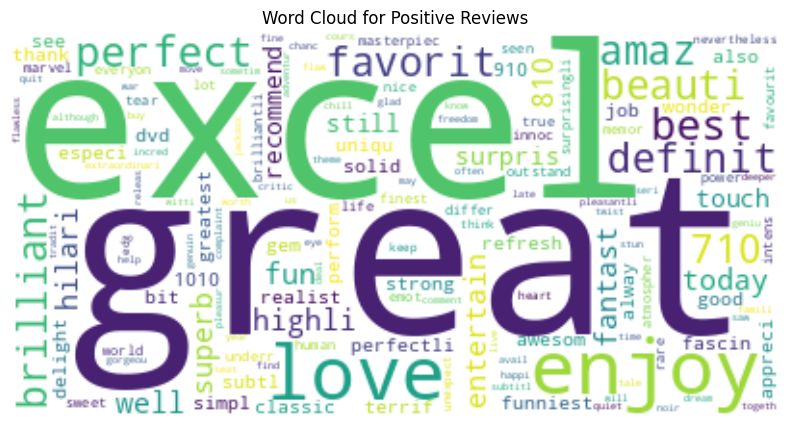

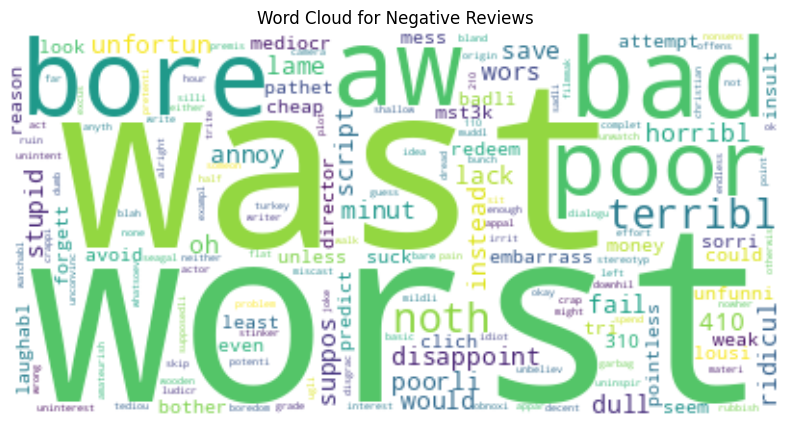

In [62]:
#Generate word cloud for positive sentiment
wordcloud_positive = WordCloud(background_color='white').generate_from_frequencies({word: coef for word, coef in zip(df_coef['feature'], df_coef['coef_positive'])})

#Generate word cloud for negative sentiment
wordcloud_negative = WordCloud(background_color='white').generate_from_frequencies({word: abs(coef) for word, coef in zip(df_coef['feature'], df_coef['coef_negative'])})

#WordCloud for positive sentiment
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

#WordCloud for negative sentiment
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()